In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

df = pd.read_csv("house_price_Dống-Da_Hà-Nội_subdata.csv",encoding = "UTF-8")
df

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [3]:
# Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu
df.isna().sum()

area                   6
price                 54
postDate               0
land_certificate     302
house_direction      629
balcony_direction    647
toilet               431
bedroom              351
floor                305
lat                    0
long                   0
property_type          0
dtype: int64

In [4]:
# Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá
df = df.dropna(subset = ["price"])

In [5]:
df["price"].unique().sum()

11037322.5

In [6]:
# Thực hiện xử lý giá trị khuyết thiếu: 
#Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”, 
#house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó
df["land_certificate"] = df["land_certificate"].fillna("không có thông tin")

/var/folders/_n/dvkgp5mx05lf2bk9v3v0gltr0000gn/T/ipykernel_42228/1992231198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["land_certificate"] = df["land_certificate"].fillna("không có thông tin")


In [7]:
df["house_direction"] = df["house_direction"].fillna(df['house_direction'].mode()[0])
df["balcony_direction"] = df["balcony_direction"].fillna(df['balcony_direction'].mode()[0])
df["toilet"] = df["toilet"].fillna(df['toilet'].mode()[0])
df["bedroom"] = df["bedroom"].fillna(df['bedroom'].mode()[0])
df["floor"] = df["floor"].fillna(df['floor'].mode()[0])

/var/folders/_n/dvkgp5mx05lf2bk9v3v0gltr0000gn/T/ipykernel_42228/2938833325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["house_direction"] = df["house_direction"].fillna(df['house_direction'].mode()[0])
/var/folders/_n/dvkgp5mx05lf2bk9v3v0gltr0000gn/T/ipykernel_42228/2938833325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["balcony_direction"] = df["balcony_direction"].fillna(df['balcony_direction'].mode()[0])
/var/folders/_n/dvkgp5mx05lf2bk9v3v0gltr0000gn/T/ipykernel_42228/2938833325.py

In [8]:
df

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,dong-Nam,dong-Nam,4.0,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.016106,105.832157,mat pho


In [9]:
# Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ
df2 = df[df["property_type"]=="trong ngo"][0:617]
df2

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo


In [10]:
df2["area"] = df2["area"].fillna(df2["area"].mean())

In [11]:
df2.isna().sum()

area                 0
price                0
postDate             0
land_certificate     0
house_direction      0
balcony_direction    0
toilet               0
bedroom              0
floor                0
lat                  0
long                 0
property_type        0
dtype: int64

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 0 to 448
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               407 non-null    float64
 1   price              407 non-null    float64
 2   postDate           407 non-null    int64  
 3   land_certificate   407 non-null    object 
 4   house_direction    407 non-null    object 
 5   balcony_direction  407 non-null    object 
 6   toilet             407 non-null    float64
 7   bedroom            407 non-null    float64
 8   floor              407 non-null    float64
 9   lat                407 non-null    float64
 10  long               407 non-null    float64
 11  property_type      407 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 41.3+ KB


In [13]:
df2["price/m2"] = df2["price"]/df2["area"]

In [14]:
df2

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,price/m2
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.000000
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.684211
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.419355
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.538462
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo,355.555556
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272.413793
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106.250000
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102.631579


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 0 to 448
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               407 non-null    float64
 1   price              407 non-null    float64
 2   postDate           407 non-null    int64  
 3   land_certificate   407 non-null    object 
 4   house_direction    407 non-null    object 
 5   balcony_direction  407 non-null    object 
 6   toilet             407 non-null    float64
 7   bedroom            407 non-null    float64
 8   floor              407 non-null    float64
 9   lat                407 non-null    float64
 10  long               407 non-null    float64
 11  property_type      407 non-null    object 
 12  price/m2           407 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 44.5+ KB


In [16]:
df2.describe()

,area,price,postDate,toilet,bedroom,floor,lat,long,price/m2
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,55.403818,8143.431450,44258.899263,3.660934,3.508600,4.830467,21.015556,105.824865,inf
std,35.093883,9465.849714,58.322884,1.557762,1.800191,1.091054,0.006996,0.009801,NaN
min,0.000000,450.000000,44197.000000,1.000000,1.000000,1.000000,20.998499,105.795544,20.000000
25%,36.000000,3100.000000,44197.000000,4.000000,3.000000,4.000000,21.009739,105.820854,88.104839
50%,50.000000,5300.000000,44292.000000,4.000000,3.000000,5.000000,21.018072,105.828294,124.000000
75%,63.500000,9350.000000,44312.000000,4.000000,4.000000,5.000000,21.020053,105.829949,187.463524
max,300.000000,120000.000000,44325.000000,16.000000,14.000000,11.000000,21.036845,105.841407,inf


In [19]:
# Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR
# Thực hiện loại bỏ các dòng dữ liệu ngoại lai

#quan_cols = df2.select_dtypes(include = "number").columns
quan_cols = ['area','price/m2']
for i in quan_cols: 
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    df2 = df2[~((df2[i]>upper_bound) | (df2[i]<lower_bound))]
df2

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,price/m2
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.000000
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.684211
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.419355
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.538462
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,25.0,2850.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,2.0,4.0,21.029522,105.827353,trong ngo,114.000000
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272.413793
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106.250000
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102.631579


<AxesSubplot: >

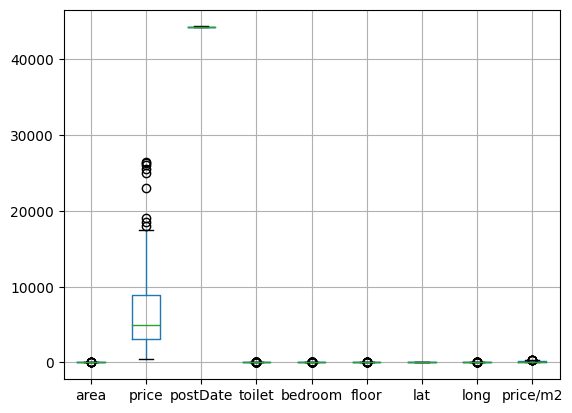

In [50]:
df2.boxplot()

<AxesSubplot: ylabel='Density'>

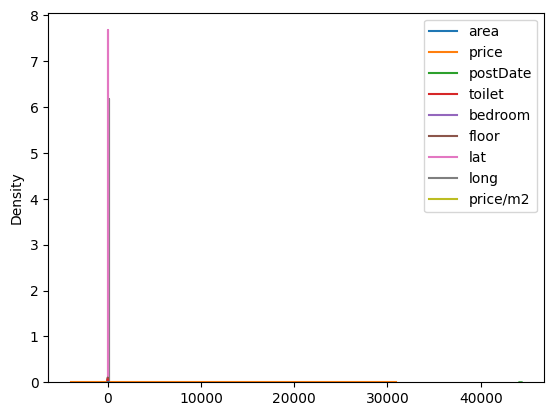

In [51]:
sns.kdeplot(data=df2)

In [33]:
# Zscore scaling
df3 = df2.loc[:,['area','price/m2']]
scaler = StandardScaler()
df3_s = scaler.fit_transform(df3)
col_names = list(df3.columns)
df3_s = pd.DataFrame(df3_s, columns=col_names)
df3_s

,area,price/m2
0,-0.013242,2.376629
1,0.385042,-0.778131
2,0.669531,0.707280
3,-1.378788,-0.236086
4,-0.582219,-0.419207
...,...,...
348,-1.435686,-0.200838
349,0.441940,2.067531
350,2.604055,-0.311813
351,-0.696015,-0.363626


<AxesSubplot: xlabel='price/m2', ylabel='Density'>

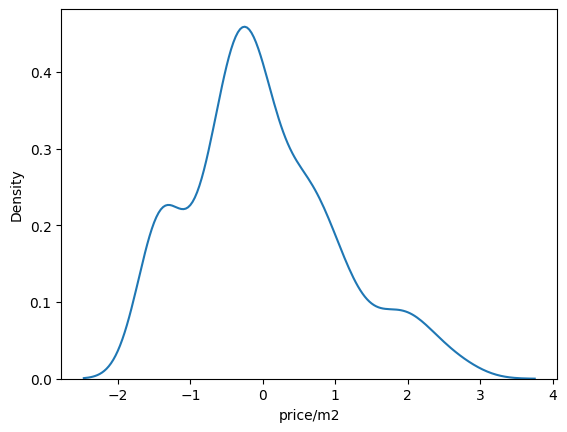

In [34]:
sns.kdeplot(data=df3_s["price/m2"])

<AxesSubplot: xlabel='price/m2'>

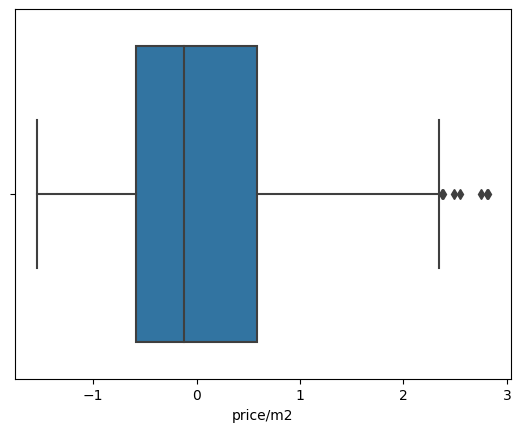

In [49]:
sns.boxplot(x=df3_s["price/m2"])

In [43]:
df3_s.describe()

,area,price/m2
count,3.530000e+02,3.530000e+02
mean,1.861904e-16,1.610295e-16
std,1.001419e+00,1.001419e+00
min,-2.061561e+00,-1.540340e+00
25%,-8.098103e-01,-5.880811e-01
50%,-1.270373e-01,-1.234716e-01
75%,5.557357e-01,5.880229e-01
max,2.888543e+00,2.820526e+00


In [52]:
# Min Max Scaling
scaler = MinMaxScaler()
df3_s = scaler.fit_transform(df3)
col_names = list(df3.columns)
df3_s = pd.DataFrame(df3_s, columns=col_names)
df3_s

,area,price/m2
0,0.413793,0.898209
1,0.494253,0.174784
2,0.551724,0.515407
3,0.137931,0.299082
4,0.298851,0.257090
...,...,...
348,0.126437,0.307164
349,0.505747,0.827329
350,0.942529,0.281716
351,0.275862,0.269835


<AxesSubplot: xlabel='price/m2', ylabel='Density'>

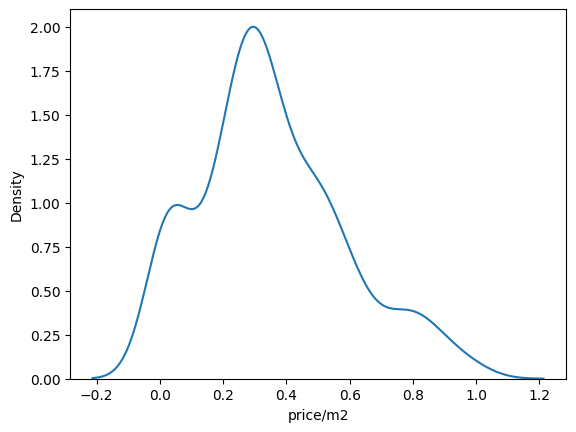

In [53]:
sns.kdeplot(data=df3_s["price/m2"])

<AxesSubplot: >

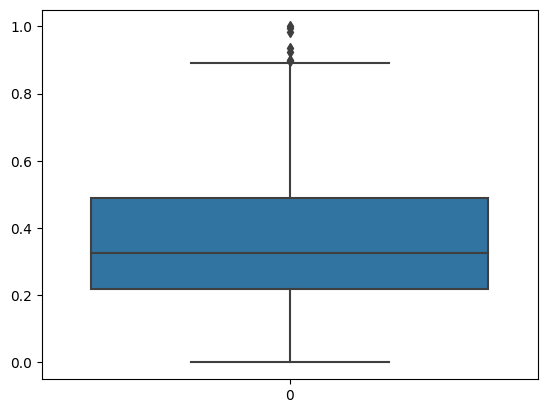

In [54]:
sns.boxplot(data = df3_s["price/m2"])

In [55]:
df3_s.describe()

,area,price/m2
count,353.000000,353.000000
mean,0.416468,0.353219
std,0.202303,0.229638
min,0.000000,0.000000
25%,0.252874,0.218365
50%,0.390805,0.324905
75%,0.528736,0.488060
max,1.000000,1.000000


In [56]:
# Robust Scaling
scaler = RobustScaler()
df3_s = scaler.fit_transform(df3)
col_names = list(df3.columns)
df3_s = pd.DataFrame(df3_s, columns=col_names)
df3_s

,area,price/m2
0,0.083333,2.125748
1,0.375000,-0.556634
2,0.583333,0.706359
3,-0.916667,-0.095752
4,-0.333333,-0.251454
...,...,...
348,-0.958333,-0.065782
349,0.416667,1.862932
350,2.000000,-0.160140
351,-0.416667,-0.204195


In [57]:
df3_s.describe()

,area,price/m2
count,353.000000,353.000000
mean,0.093030,0.104984
std,0.733347,0.851472
min,-1.416667,-1.204714
25%,-0.500000,-0.395041
50%,0.000000,0.000000
75%,0.500000,0.604959
max,2.208333,2.503178


<AxesSubplot: xlabel='price/m2', ylabel='Density'>

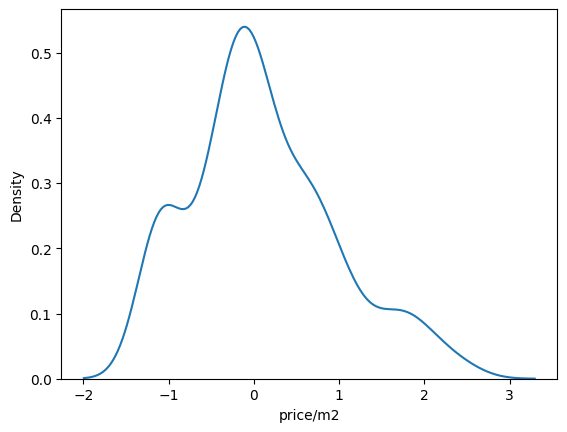

In [58]:
sns.kdeplot(data=df3_s["price/m2"])

<AxesSubplot: >

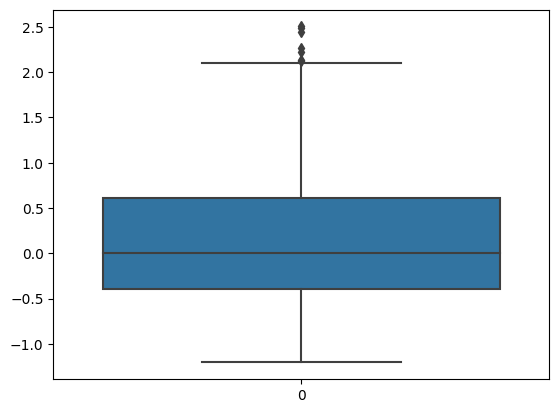

In [59]:
sns.boxplot(data = df3_s["price/m2"])